In [1]:
#! wget https://www.dropbox.com/s/t0fngc472gdi5bk/anime-recommendations-database.zip
#! unzip anime-recommendations-database.zip
#! ls

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
#from wordcloud import WordCloud
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [3]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
df['type'] = df['type'].fillna('None')
df['genre'] = df['genre'].fillna('None')
df['rating'] = df['rating'].fillna(df['rating'].median())
episode_ = df['episodes'].replace('Unknown', np.nan)
episode_ = episode_.fillna(episode_.median())
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [6]:
type_ = pd.get_dummies(df['type'])
genre_ = df['genre'].str.get_dummies(sep=',')
genre_.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = pd.concat([genre_, type_, episode_, df['rating'], df['members']],axis=1)
X.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Movie,Music,None,ONA,OVA,Special,TV,episodes,rating,members
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,9.37,200630
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,64,9.26,793665
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,51,9.25,114262
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,24,9.17,673572
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,51,9.16,151266


In [8]:
scaled = MaxAbsScaler()
X = scaled.fit_transform(X)

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors
#recommendations = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(X)
recommendations = NearestNeighbors(n_neighbors=11, algorithm='auto').fit(X)
recommendations.kneighbors(X)

(array([[0.00000000e+00, 1.01506549e+00, 1.03095542e+00, ...,
         1.45773221e+00, 1.45854509e+00, 1.45930354e+00],
        [0.00000000e+00, 1.02227158e+00, 1.49378838e+00, ...,
         1.65016556e+00, 1.74844630e+00, 1.78151418e+00],
        [0.00000000e+00, 3.75894154e-02, 4.12559430e-02, ...,
         1.42104554e+00, 1.42183188e+00, 1.42808851e+00],
        ...,
        [0.00000000e+00, 1.66436926e-03, 1.68253094e-03, ...,
         8.07869678e-03, 1.01353307e-02, 1.11230973e-02],
        [0.00000000e+00, 1.00174940e-03, 1.10513608e-03, ...,
         4.01486740e-03, 5.00190620e-03, 5.03023042e-03],
        [0.00000000e+00, 1.00179958e+00, 1.41421365e+00, ...,
         1.41421400e+00, 1.41421404e+00, 1.41421417e+00]]),
 array([[    0,   208,  1494, ...,  5796,  5697,  5805],
        [    1,   200,   268, ...,  6868,   288,   374],
        [    2,     4,     9, ...,   216,   306,  1833],
        ...,
        [12291, 12238, 12237, ..., 12239, 12292, 12231],
        [12292, 12231, 1

In [10]:
anime_indices = recommendations.kneighbors(X)[1] 

In [11]:
anime_indices

array([[    0,   208,  1494, ...,  5796,  5697,  5805],
       [    1,   200,   268, ...,  6868,   288,   374],
       [    2,     4,     9, ...,   216,   306,  1833],
       ...,
       [12291, 12238, 12237, ..., 12239, 12292, 12231],
       [12292, 12231, 12232, ..., 12234, 12228, 12236],
       [12293, 11805, 12145, ..., 12140, 12147, 12141]], dtype=int64)

In [12]:
def get_index(x):
    # gives index for the anime
    return df[df['name']==x].index.tolist()[0] # Return a list of the values

def get_recommend_item(anime):
    print('Here are 10 anime similar to', anime, ':' '\n')
    index = get_index(anime)
    
    # ignore first entry so as to not return the queried anime as similar to itself
    for i in anime_indices[index][1:]:
            print(df.iloc[i]['name'], 
                  '\n' 'Genre: ', df.iloc[i]['genre'],
                  '\n' 'Episode count: ', df.iloc[i]['episodes'],
                  '\n' 'Rating out of 10:', df.iloc[i]['rating'], '\n')

In [13]:
df[df['name']=='Kimi no Na wa.'].index.tolist()[0]
#df[df['name']=='Gintama'].index.tolist()[0]


0

In [14]:
print (df.iloc[0]['name'],'\n', df.iloc[0]['genre'], '\n')

Kimi no Na wa. 
 Drama, Romance, School, Supernatural 



In [15]:
#get_recommend_item('Death Note')

#get_recommend_item('One Piece')

get_recommend_item('Kimi no Na wa.')

Here are 10 anime similar to Kimi no Na wa. :

Kokoro ga Sakebitagatterunda. 
Genre:  Drama, Romance, School 
Episode count:  1 
Rating out of 10: 8.32 

Harmonie 
Genre:  Drama, School, Supernatural 
Episode count:  1 
Rating out of 10: 7.52 

Air Movie 
Genre:  Drama, Romance, Supernatural 
Episode count:  1 
Rating out of 10: 7.39 

Hotarubi no Mori e 
Genre:  Drama, Romance, Shoujo, Supernatural 
Episode count:  1 
Rating out of 10: 8.61 

Clannad Movie 
Genre:  Drama, Fantasy, Romance, School 
Episode count:  1 
Rating out of 10: 7.35 

Momo e no Tegami 
Genre:  Drama, Supernatural 
Episode count:  1 
Rating out of 10: 7.78 

&quot;Bungaku Shoujo&quot; Movie 
Genre:  Drama, Mystery, Romance, School 
Episode count:  1 
Rating out of 10: 7.63 

Taifuu no Noruda 
Genre:  Drama, School, Sci-Fi, Supernatural 
Episode count:  1 
Rating out of 10: 6.35 

Shiranpuri (Movie) 
Genre:  Drama, School 
Episode count:  1 
Rating out of 10: 6.38 

Wind: A Breath of Heart OVA 
Genre:  Drama, Roma

In [16]:
df['name'].tail(10)

12284                                   Super Erotic Anime
12285                                     Taimanin Asagi 3
12286                                  Teleclub no Himitsu
12287                               Tenshi no Habataki Jun
12288                                     The Satisfaction
12289         Toushindai My Lover: Minami tai Mecha-Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293                     Yasuji no Pornorama: Yacchimae!!
Name: name, dtype: object

機械学習を使って630万件のレビューに基づいたアニメのレコメンド機能を作ってみよう（機械学習 k近傍法 初心者向け）
https://www.codexa.net/collaborative-filtering-k-nearest-neighbor/

In [17]:
# 使用するライブラリのインポート
import pandas as pd
import numpy as np 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# CSVファイルをデータフレーム形式として読み込み
# 保存先が異なる場合はパスも指定してあげましょう
ratings = pd.read_csv('rating.csv')
anime = pd.read_csv('anime.csv')

# animeデータフレームの最初の五行を表示
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [18]:
# animeのデータフレームをmemberの値で並び替え
anime.sort_values('members', ascending= False)[:10]

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


In [19]:
# animeの基本統計量の確認
round(anime.describe(),2)

,anime_id,rating,members
count,12294.00,12064.00,12294.00
mean,14058.22,6.47,18071.34
std,11455.29,1.03,54820.68
min,1.00,1.67,5.00
25%,3484.25,5.88,225.00
50%,10260.50,6.57,1550.00
75%,24794.50,7.18,9437.00
max,34527.00,10.00,1013917.00


In [20]:
# ratingsの基本統計量の確認
round(ratings.describe(),2)


,user_id,anime_id,rating
count,7813737.00,7813737.00,7813737.00
mean,36727.96,8909.07,6.14
std,20997.95,8883.95,3.73
min,1.00,1.00,-1.00
25%,18974.00,1240.00,6.00
50%,36791.00,6213.00,7.00
75%,54757.00,14093.00,9.00
max,73516.00,34519.00,10.00


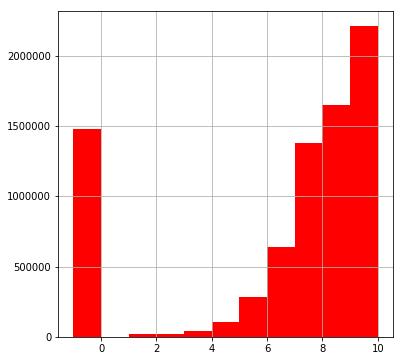

In [21]:
# ratingsのヒストグラムを作成
ratings['rating'].hist(bins=11, figsize=(6,6), color = 'red')
#レーティングのヒストグラムを確認してみると、「-1」（見たけどレーティングなし）と「7以上」の値がデータのほとんどを占めている

In [22]:
# 欠損データの確認
anime.isnull().sum()


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [23]:
# 欠損データをdropna()でデータセットから取り除く
anime = anime.dropna()


In [24]:
# raitingの値が0以上のみ残す
ratings = ratings[ratings.rating >= 0]


In [25]:
# animeとratingsの2つのデータフレームをマージさせる
mergeddf = ratings.merge(anime, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])
# 合体したデータフレームの最初の5行を表示
mergeddf.head()


,user_id,anime_id,rating_user,name,genre,type,episodes,rating,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,3,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
2,5,8074,2,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
3,12,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
4,14,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


In [26]:
# mergeddfの基本統計量の確認
round(mergeddf.describe(),2)


,user_id,anime_id,rating_user,rating,members
count,6337146.00,6337146.00,6337146.00,6337146.00,6337146.00
mean,36747.95,8902.55,7.81,7.68,184576.85
std,21013.37,8881.67,1.57,0.67,190953.41
min,1.00,1.00,1.00,2.00,33.00
25%,18985.00,1239.00,7.00,7.29,46803.00
50%,36815.00,6213.00,8.00,7.70,117091.00
75%,54873.00,14075.00,9.00,8.15,256325.00
max,73516.00,34475.00,10.00,9.37,1013917.00


In [27]:
# 不必要な項目と重複項目を削除
mergeddf = mergeddf[['user_id','name','rating_user']]
mergeddf = mergeddf.drop_duplicates(['user_id','name'])
# head()で最初の5行を表示
mergeddf.head()


,user_id,name,rating_user
0,1,Highschool of the Dead,10
1,3,Highschool of the Dead,6
2,5,Highschool of the Dead,2
3,12,Highschool of the Dead,6
4,14,Highschool of the Dead,6


In [28]:
# データフレームのピボット
anime_pivot = mergeddf.pivot(index= 'name',columns='user_id',values='rating_user').fillna(0)
anime_pivot_sparse = csr_matrix(anime_pivot.values)


In [29]:
# anime_pivotの最初の10行を表示
anime_pivot.head(10)


user_id,1,2,3,5,7,8,9,10,11,12,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy: Parody Mode,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Scikit-learnのライブラリを利用します
# n_neiborsやalgorithm、metricなど重要なアーギュメントを設定しています
knn = NearestNeighbors(n_neighbors=11,algorithm= 'auto')
# 前処理したデータセットでモデルを訓練
model_knn = knn.fit(anime_pivot_sparse)


In [31]:
# データセットのタイトルをキーワードで検索
def searchanime(string):
    print(anime_pivot[anime_pivot.index.str.contains(string)].index[0:])

searchanime('Hajime')


Index(['21 Seiki Manga Hajimete Monogatari',
       'Anpanman to Hajime yo! Iro, Kazu, Katachi Wakarukana Iro, Katachi',
       'Bokura wa Minna Kawaisou: Hajimete no', 'Hajime Ningen Gon',
       'Hajime Ningen Gyatoruz', 'Hajime no Ippo',
       'Hajime no Ippo: Boxer no Kobushi', 'Hajime no Ippo: Champion Road',
       'Hajime no Ippo: Mashiba vs. Kimura', 'Hajime no Ippo: New Challenger',
       'Hajime no Ippo: Rising', 'Hajimete no Christmas',
       'Kamisama Hajimemashita', 'Kamisama Hajimemashita OVA',
       'Kamisama Hajimemashita: Kako-hen', 'Kamisama Hajimemashita◎',
       'Kobato.: Hajimete no Kobato.', 'Kyou, Koi wo Hajimemasu',
       'Manga Hajimete Monogatari', 'Manga Hajimete Omoshiro Juku',
       'Natsume Yuujinchou: Nyanko-sensei to Hajimete no Otsukai',
       'Re:Petit kara Hajimeru Isekai Seikatsu',
       'Re:Zero kara Hajimeru Break Time',
       'Re:Zero kara Hajimeru Isekai Seikatsu', 'Sekirei: Hajimete no Otsukai',
       'Super Real Mahjong: Kasumi Miki 

In [32]:
# 「はじめの一歩」に対してのオススメのアニメ10個
Anime = 'Hajime no Ippo'
distance, indice = model_knn.kneighbors(anime_pivot.iloc[anime_pivot.index== Anime].values.reshape(1,-1),n_neighbors=11)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendations if you like the anime {0}:\n'.format(anime_pivot[anime_pivot.index== Anime].index[0]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,anime_pivot.index[indice.flatten()[i]],distance.flatten()[i]))


Recommendations if you like the anime Hajime no Ippo:

1: Hajime no Ippo: New Challenger with distance: 321.24134229578857
2: Hajime no Ippo: Champion Road with distance: 424.7163759498802
3: Hajime no Ippo: Mashiba vs. Kimura with distance: 448.17965147918085
4: Hajime no Ippo: Rising with distance: 454.47882238889855
5: Hajime no Ippo: Boxer no Kobushi with distance: 535.2597500279654
6: Major S4 with distance: 564.5803751460016
7: Major S2 with distance: 565.1212259329851
8: Major S3 with distance: 565.2043878102859
9: Major S1 with distance: 565.8285959546407
10: Major S5 with distance: 567.3358793519056


In [33]:
# 「君の名は」を見たことがあるあなたにオススメのアニメは・・・
Anime = 'Kimi no Na wa.'
distance, indice = model_knn.kneighbors(anime_pivot.iloc[anime_pivot.index== Anime].values.reshape(1,-1),n_neighbors=11)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendations if you like the anime {0}:\n'.format(anime_pivot[anime_pivot.index== Anime].index[0]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,anime_pivot.index[indice.flatten()[i]],distance.flatten()[i]))


Recommendations if you like the anime Kimi no Na wa.:

1: Koe no Katachi with distance: 416.99880095750876
2: Suntory Minami Alps no Tennen Mizu with distance: 418.0358836272312
3: Omoi no Kakera with distance: 418.79947468925985
4: Mitsuami no Kamisama with distance: 418.84603376419835
5: Dear Brave with distance: 418.87229557467754
6: Under the Dog: Anthea-chan with distance: 418.98090648620257
7: Children Record with distance: 418.99522670312126
8: Wangpai Yushi Di 0 Ji with distance: 418.9976133583579
9: BlazBlue: Alter Memory Specials with distance: 419.0262521608879
10: Osomatsu-kun (1988) with distance: 419.03460477626425


https://www.kaggle.com/narumin/anime-recommend-japanese-tutorial

In [34]:
# ref: https://www.codexa.net/collaborative-filtering-k-nearest-neighbor/
# ref: https://www.kaggle.com/ajmichelutti/collaborative-filtering-on-anime-data

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'anime-recommendations-database.zip', 'anime.csv', 'CaseStudy_第3回_recommendation_anime_nn.ipynb', 'ImageNetで推論.ipynb', 'IMDB recommendation.ipynb', 'IMDBのカラム', 'movie_metadata.csv', 'rating.csv']


In [35]:
# data analysis and wrangling
import pandas as pd
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20
import numpy as np
import random as rnd
import operator
import itertools
import collections

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls

# machine learning
from scipy import stats
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import jaccard_similarity_score
from xgboost import XGBClassifier

# warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\hiroa\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:
# アニメ一覧
df_anime = pd.read_csv('./anime.csv')
# ユーザー評価
df_rating = pd.read_csv('./rating.csv')

In [37]:
df_anime.isnull().sum() 

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [38]:
#type, ratingの欠損は今回は使用しないので修復しない
#欠損しているgenreはジャンル無しとする
# 欠損値を確認
df_rating.isnull().sum() 

user_id     0
anime_id    0
rating      0
dtype: int64

In [39]:
df_anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [40]:
df_anime.describe(include=['O'])

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


In [41]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [42]:
df_rating.describe()
#ratingが-1は未回答。

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [43]:
# 高評価トップ10
df_anime.sort_values('rating', ascending=False).loc[:10]

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [44]:
# メンバー数トップ10
df_anime.sort_values('members', ascending=False)[:10]

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


In [45]:
# メンバー数が少ない（人気が少ない）アニメはお勧め対象外
df_anime = df_anime[df_anime['members'] >= 10000]

df_anime.shape[0]

2990

In [46]:
# アニメ名で部分一致検索
def search_anime(name):
    print(df_anime.loc[df_anime['name'].str.contains(name, case=False), 'name'].values)
    
search_anime('madoka')

['Mahou Shoujo Madoka★Magica'
 'Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari'
 'Mahou Shoujo Madoka★Magica Movie 2: Eien no Monogatari'
 'Mahou Shoujo Madoka★Magica Movie 1: Hajimari no Monogatari']


In [47]:
# genreを配列にする
df_anime['genre'] = df_anime['genre'].apply(lambda x: x.split(', ') if type(x) is str else [])

In [48]:
genre_data = itertools.chain(*df_anime['genre'].values.tolist()) # フラットな配列に変更
genre_counter = collections.Counter(genre_data) # ジャンル別カウント

df_genre = pd.DataFrame.from_dict(genre_counter, orient='index').reset_index().rename(columns={'index': 'genre', 0:'count'})
df_genre.sort_values('count', ascending=False, inplace=True)

[Text(0,0.5,'Genre'), Text(0.5,0,'Anime Count')]

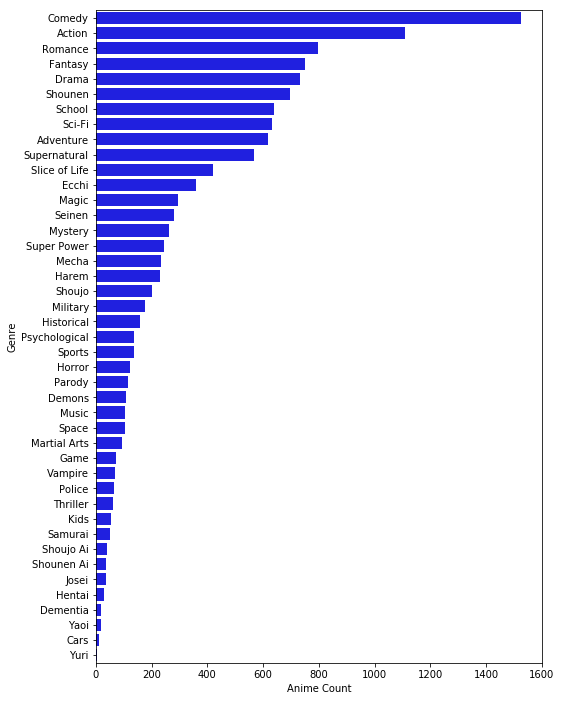

In [49]:
# ジャンル数ランキングを表示
figure, ax = plt.subplots(figsize=(8, 12))
sns.barplot(x='count', y='genre', data=df_genre, color='b')
ax.set(ylabel='Genre', xlabel='Anime Count')

In [50]:
genre_map = {genre: idx for idx, genre in enumerate(genre_counter.keys())} # ジャンル名: Index

# ジャンルをOne-hot表現に変換
def extract_feature(genre):
    feature = np.zeros(len(genre_map.keys()), dtype=int)
    feature[[genre_map[idx] for idx in genre]] += 1
    return feature

df_anime_feature = pd.concat([df_anime['anime_id'], df_anime['name'], df_anime['genre']], axis=1)
df_anime_feature['genre'] = df_anime_feature['genre'].apply(lambda x: extract_feature(x))
df_anime_feature.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,5114,Fullmetal Alchemist: Brotherhood,"[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."
2,28977,Gintama°,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."
3,9253,Steins;Gate,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,9969,Gintama&#039;,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."


In [51]:
# ジャンルが似ているアニメを取得
def similar_genre_animes(anime_name, num=100, verbose=False):
    anime_index = df_anime_feature[df_anime_feature['name'] == anime_name].index[0]
    s_anime = df_anime_feature[df_anime_feature.index== anime_index]
    anime_name = s_anime['name'].values[0]
    anime_genre = s_anime['genre'].values[0]
    df_search = df_anime_feature.drop(anime_index)
    # Jaccard 係数が高いアニメを取得
    # 集合 X と集合 Y がどれくらい似ているか
    # A または B に含まれている要素のうち A にも B にも含まれている要素の割合
    # ref: https://mathwords.net/jaccardkeisu
    df_search['jaccard'] = df_search['genre'].apply(lambda x: jaccard_similarity_score(anime_genre, x))
    df_result = df_search.sort_values('jaccard', ascending=False).head(num)
    if verbose:
        print('【{}】　にジャンルが似ているアニメ'.format(anime_name))
        for idx, res in df_result.iterrows():
            print('\t{}'.format(res['name']))
        print()
    return df_result
    
# 【魔法少女まどか☆マギカ】にジャンルが似ているアニメトップ10
_ = similar_genre_animes('Mahou Shoujo Madoka★Magica', num=10, verbose=True)

【Mahou Shoujo Madoka★Magica】　にジャンルが似ているアニメ
	Mahou Shoujo Madoka★Magica Movie 2: Eien no Monogatari
	Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari
	Mahou Shoujo Madoka★Magica Movie 1: Hajimari no Monogatari
	Zankyou no Terror
	Uta Kata
	Shigofumi Special
	Re:Zero kara Hajimeru Isekai Seikatsu
	Shigofumi
	Rain Town
	Omoide no Marnie



In [52]:
# ユーザー評価にアニメ情報を結合する
df_merge = df_rating.merge(df_anime, left_on='anime_id', right_on='anime_id', suffixes=['_user', ''])
round(df_merge.describe(), 2)

,user_id,anime_id,rating_user,rating,members
count,7299267.00,7299267.00,7299267.00,7299261.00,7299267.00
mean,36633.31,9032.21,6.24,7.72,190857.19
std,21019.63,8925.84,3.71,0.62,188763.00
min,1.00,1.00,-1.00,2.37,10005.00
25%,18863.00,1195.00,6.00,7.34,54854.00
50%,36438.00,6500.00,8.00,7.73,125051.00
75%,54742.00,14345.00,9.00,8.17,260062.00
max,73516.00,34240.00,10.00,9.37,1013917.00


In [53]:
# 使わないカラムを削除
df_merge = df_merge[['user_id', 'anime_id', 'name', 'rating_user']]
# 重複している評価を削除
df_merge = df_merge.drop_duplicates(['user_id', 'name'])

df_merge.head()

,user_id,anime_id,name,rating_user
0,1,20,Naruto,-1
1,3,20,Naruto,8
2,5,20,Naruto,6
3,6,20,Naruto,-1
4,10,20,Naruto,-1


In [54]:
# 行をアニメ、カラムをユーザーに変形
df_anime_pivot = df_merge.pivot(index='anime_id', columns='user_id', values='rating_user').fillna(0)
# 疎行列に変換
# ref: http://hamukazu.com/2014/09/26/scipy-sparse-basics/
anime_pivot_sparse = csr_matrix(df_anime_pivot)

In [55]:
# K近傍法で学習
# ref: https://qiita.com/yshi12/items/26771139672d40a0be32
# brute:  力任せ検索
# ref: https://ja.wikipedia.org/wiki/%E5%8A%9B%E3%81%BE%E3%81%8B%E3%81%9B%E6%8E%A2%E7%B4%A2
# cosine: コサイン類似度
# ref: http://www.cse.kyoto-su.ac.jp/~g0846020/keywords/cosinSimilarity.html
knn = NearestNeighbors(n_neighbors=9, algorithm='brute', metric='cosine')
model_knn = knn.fit(anime_pivot_sparse)

In [56]:
# ユーザー評価が似ているアニメを取得
def similar_rating_animes(anime_name, num=100, verbose=False):
    anime_id = df_anime.loc[df_anime['name'] == anime_name, 'anime_id'].values[0]
    users_rating = df_anime_pivot.iloc[df_anime_pivot.index == anime_id].values.reshape(1, -1)
    # コサイン類似度が近いアニメを取得
    # イメージ的にはユーザーが同じような評価を付けているアニメ
    distance, indice = model_knn.kneighbors(users_rating, n_neighbors=num)
    df_result = df_anime_pivot.iloc[indice.flatten()]
    df_result['distance'] = distance.flatten()
    df_result['name'] = df_result.index.map(lambda x: df_anime.loc[df_anime['anime_id'] == x, 'name'].values[0])
    df_result = df_result.drop(anime_id)
    df_result = df_result.sort_values('distance', ascending=True).head(num)
    df_result = df_result.reset_index()
    df_result = df_result[['anime_id', 'name', 'distance']]
    df_result.columns = ['anime_id', 'name', 'distance']
    if verbose:
        print('【{0}】 とユーザー評価が似ているアニメ'.format(anime_name))
        for idx, res in df_result.iterrows():
            print('\t{0}'.format(res['name']))
    return df_result
    
# 【魔法少女まどか☆マギカ】にユーザー評価が似ているアニメトップ10
_ = similar_rating_animes('Mahou Shoujo Madoka★Magica', num=10, verbose=True)

【Mahou Shoujo Madoka★Magica】 とユーザー評価が似ているアニメ
	Steins;Gate
	Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari
	Angel Beats!
	Bakemonogatari
	Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.
	Kill la Kill
	Fate/Zero
	Toradora!
	Tengen Toppa Gurren Lagann


In [57]:
# ユーザー評価とジャンル評価を組み合わせてお勧めなアニメを取得する
def similar_animes(anime_name, genre_weight=0.5, rating_weight=0.5, num=20, verbose=False):
    df_genre_similar = similar_genre_animes(anime_name) # ジャンル高評価
    df_rating_similar = similar_rating_animes(anime_name) # ユーザー高評価
    #  ジャンル評価とユーザー評価を外部結合でマージしたテーブルを作成
    df_similar_merge = df_rating_similar.merge(
        df_genre_similar, left_on=['anime_id', 'name'], right_on=['anime_id', 'name'], how='outer')
    # ジャンル高評価に引っかかっていない場合はJaccard 係数は0（最低評価）
    df_similar_merge['jaccard'].fillna(0, inplace=True)
    # ユーザー高評価に引っかかっていない場合はコサイン類似度は1（最低評価）
    df_similar_merge['distance'].fillna(1, inplace=True) 
    # 各評価を0~1で正規化
    df_score_genre= df_similar_merge['jaccard'] / df_similar_merge['jaccard'].max()
    df_score_rating = (1.0 - df_similar_merge['distance']) / df_similar_merge['distance'].max()
    #　総合評価（最大1）を取得
    df_similar_merge['score'] =  (genre_weight * df_score_genre + rating_weight * df_score_rating) / 2
    # 総合評価が高いアニメ一覧を取得
    df_result = df_similar_merge.sort_values('score', ascending=False).head(num)
    df_result.reset_index(inplace=True)
    df_result = df_result[['anime_id', 'name', 'score']]
    if verbose:
        print('【{0}】 が好きな人におすすめなアニメ'.format(anime_name))
        for idx, res in df_result.iterrows():
            print('\t{0}'.format(res['name']))
    return df_result
    
# 【魔法少女まどか☆マギカ】が好きな人にお勧めなアニメトップ10
_ = similar_animes('Mahou Shoujo Madoka★Magica', verbose=True)

【Mahou Shoujo Madoka★Magica】 が好きな人におすすめなアニメ
	Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari
	Steins;Gate
	Mahou Shoujo Madoka★Magica Movie 1: Hajimari no Monogatari
	Mahou Shoujo Madoka★Magica Movie 2: Eien no Monogatari
	Zankyou no Terror
	Higurashi no Naku Koro ni Kai
	Death Parade
	Steins;Gate: Oukoubakko no Poriomania
	Mawaru Penguindrum
	NHK ni Youkoso!
	Re:Zero kara Hajimeru Isekai Seikatsu
	Uta Kata
	Shigofumi Special
	Black Jack
	Tsumiki no Ie
	Houkago no Pleiades
	Mizu no Kotoba
	Mahou Shoujo Taisen
	Grisaia no Meikyuu: Caprice no Mayu 0
	Kuro no Sumika: Chronus


https://medium.com/learning-machine-learning/recommending-animes-using-nearest-neighbors-61320a1a5934

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [59]:
anime = pd.read_csv("anime.csv")

In [60]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [61]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [62]:
anime[anime['episodes']=='Unknown'].head(3)

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578


In [63]:
anime.loc[(anime["genre"]=="Hentai") & (anime["episodes"]=="Unknown"),"episodes"] = "1"
anime.loc[(anime["type"]=="OVA") & (anime["episodes"]=="Unknown"),"episodes"] = "1"

anime.loc[(anime["type"] == "Movie") & (anime["episodes"] == "Unknown")] = "1"

Episodes
Many animes have unknown number of episodes even if they have similar rating. On top of that many super popular animes such as Naruto Shippuden, Attack on Titan Season 2 were ongoing when the data was collected, thus their number of episodes was considered as "Unknown". For some of my favorite animes I've filled in the episode numbers manually. For the other anime's, I had to make some educated guesses. Changes I've made are :

Animes that are grouped under Hentai Categories generally have 1 episode in my experience. So I've filled the unknown values with 1.

Animes that are grouped are "OVA" stands for "Original Video Animation". These are generally one/two episode long animes(often the popular ones have 2/3 episodes though), but I've decided to fill the unknown numbers of episodes with 1 again.

Animes that are grouped under "Movies" are considered as '1' episode as per the dataset overview goes.

For all the other animes with unknown number of episodes, I've filled the na values with the median which is 2.

In [64]:
known_animes = {"Naruto Shippuuden":500, "One Piece":784,"Detective Conan":854, "Dragon Ball Super":86,
                "Crayon Shin chan":942, "Yu Gi Oh Arc V":148,"Shingeki no Kyojin Season 2":25,
                "Boku no Hero Academia 2nd Season":25,"Little Witch Academia TV":25}

In [65]:
for k,v in known_animes.items():    
    anime.loc[anime["name"]==k,"episodes"] = v

In [66]:
anime["episodes"] = anime["episodes"].map(lambda x:np.nan if x=="Unknown" else x)

In [67]:
anime["episodes"].fillna(anime["episodes"].median(),inplace = True)

In [68]:
pd.get_dummies(anime[["type"]]).head()

,type_1,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


Rating, Members and Genre
For members feature, I Just converted the strings to float.Episode numbers, members and rating are different from categorical variables and very different in values. Rating ranges from 0-10 in the dataset while the episode number can be even 800+ episodes long when it comes to long running popular animes such as One Piece, Naruto etc. So I ended up using sklearn.preprocessing.MinMaxScaler as it scales the values from 0-1.Many animes have unknown ratings. These were filled with the median of the ratings.

In [69]:
anime["rating"] = anime["rating"].astype(float)
anime["rating"].fillna(anime["rating"].median(),inplace = True)
anime["members"] = anime["members"].astype(float)

In [70]:
# Scaling
anime_features = pd.concat([anime["genre"].str.get_dummies(sep=","),
                            pd.get_dummies(anime[["type"]]),
                            anime[["rating"]],anime[["members"]],anime["episodes"]],axis=1)
anime["name"] = anime["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))
anime_features.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,type_1,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9.37,200630.0,1
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,9.26,793665.0,64
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.25,114262.0,51
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.17,673572.0,24
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.16,151266.0,51


In [71]:
anime_features.columns

Index([' Adventure', ' Cars', ' Comedy', ' Dementia', ' Demons', ' Drama',
       ' Ecchi', ' Fantasy', ' Game', ' Harem', ' Hentai', ' Historical',
       ' Horror', ' Josei', ' Kids', ' Magic', ' Martial Arts', ' Mecha',
       ' Military', ' Music', ' Mystery', ' Parody', ' Police',
       ' Psychological', ' Romance', ' Samurai', ' School', ' Sci-Fi',
       ' Seinen', ' Shoujo', ' Shoujo Ai', ' Shounen', ' Shounen Ai',
       ' Slice of Life', ' Space', ' Sports', ' Super Power', ' Supernatural',
       ' Thriller', ' Vampire', ' Yaoi', ' Yuri', '1', 'Action', 'Adventure',
       'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
       'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids',
       'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery',
       'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School',
       'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Slice of Life', 'Space',
       'Sports', 'Super Power', 'Supernat

In [72]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
anime_features = min_max_scaler.fit_transform(anime_features)

In [73]:
np.round(anime_features,2)

array([[0.  , 0.  , 0.  , ..., 0.93, 0.2 , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.92, 0.78, 0.03],
       [0.  , 0.  , 1.  , ..., 0.92, 0.11, 0.03],
       ...,
       [0.  , 0.  , 0.  , ..., 0.43, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.44, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.5 , 0.  , 0.  ]])

In [74]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(anime_features)

In [75]:
distances, indices = nbrs.kneighbors(anime_features)


Query examples and helper functions
Many anime names have not been documented properly and in many cases the names are in Japanese instead of English and the spelling is often different. For that reason I've also created another helper function get_id_from_partial_name to find out ids of the animes from part of names.

In [76]:
def get_index_from_name(name):
    return anime[anime["name"]==name].index.tolist()[0]

In [77]:
all_anime_names = list(anime.name.values)

In [78]:
def get_id_from_partial_name(partial):
    for name in all_anime_names:
        if partial in name:
            print(name,all_anime_names.index(name))

In [79]:
""" print_similar_query can search for similar animes both by id and by name. """

def print_similar_animes(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(anime.ix[id]["name"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(anime.ix[id]["name"])

In [80]:
print_similar_animes(query="Naruto")

Naruto Shippuuden
Katekyo Hitman Reborn 
Bleach
Dragon Ball Z
Boku no Hero Academia


In [81]:
print_similar_animes("Noragami")

Noragami Aragoto
JoJo no Kimyou na Bouken TV 
JoJo no Kimyou na Bouken Stardust Crusaders
JoJo no Kimyou na Bouken Stardust Crusaders 2nd Season
Yumekui Merry


In [82]:
print_similar_animes("Mushishi")

Mushishi Zoku Shou
Mushishi Zoku Shou 2nd Season
Mushishi Special Hihamukage
Mushishi Zoku Shou Odoro no Michi
Mushishi Zoku Shou Suzu no Shizuku


In [83]:
print_similar_animes("Gintama")

Gintama 039 
Gintama 
Gintama 039 Enchousen
Gintama 2017 
Gintama Movie Kanketsu hen Yorozuya yo Eien Nare


In [84]:
print_similar_animes("Fairy Tail")

Fairy Tail 2014 
Magi The Labyrinth of Magic
Magi The Kingdom of Magic
Densetsu no Yuusha no Densetsu
Magi Sinbad no Bouken TV 


In [85]:
get_id_from_partial_name("Naruto")

Boruto Naruto the Movie 486
Naruto Shippuuden 615
The Last Naruto the Movie 719
Naruto Shippuuden Movie 6 Road to Ninja 784
Naruto 841
Boruto Naruto the Movie Naruto ga Hokage ni Natta Hi 1103
Naruto Shippuuden Movie 5 Blood Prison 1237
Naruto x UT 1343
Naruto Shippuuden Movie 4 The Lost Tower 1472
Naruto Shippuuden Movie 3 Hi no Ishi wo Tsugu Mono 1573
Naruto Shippuuden Movie 1 1827
Naruto Shippuuden Movie 2 Kizuna 1828
Naruto Shippuuden Shippuu quot Konoha Gakuen quot Den 2374
Naruto Honoo no Chuunin Shiken Naruto vs Konohamaru  2416
Naruto SD Rock Lee no Seishun Full Power Ninden 2457
Naruto Shippuuden Sunny Side Battle 2458
Naruto Movie 1 Dai Katsugeki Yuki Hime Shinobu Houjou Dattebayo  2756
Naruto Soyokazeden Movie Naruto to Mashin to Mitsu no Onegai Dattebayo  2997
Naruto Movie 2 Dai Gekitotsu Maboroshi no Chiteiiseki Dattebayo  3449
Naruto Dai Katsugeki Yuki Hime Shinobu Houjou Dattebayo Special Konoha Annual Sports Festival 3529
Naruto Movie 3 Dai Koufun Mikazuki Jima no Anima

In [86]:
print_similar_animes(id=719)

Naruto Shippuuden Movie 6 Road to Ninja
Boruto Naruto the Movie
Naruto Shippuuden Movie 4 The Lost Tower
Naruto Shippuuden Movie 3 Hi no Ishi wo Tsugu Mono
Naruto Honoo no Chuunin Shiken Naruto vs Konohamaru 


In [87]:
print_similar_animes("Kimi no Na wa ")

Kokoro ga Sakebitagatterunda 
Harmonie
Air Movie
Hotarubi no Mori e
Momo e no Tegami


Helper functions
I wrote some helper functions to query and show the results.

[get_index_from_name(name)]:
Returns the index of the anime if given the full name.


[get_index_from_partial_name(name)] : 
Returns the index of all the animes that has that substring in their name. Many anime names have not been documented properly and in many cases the names are in Japanese instead of English and the spelling is often different. So I created this one.


[print_similar_animes(query,id)]:
Prints the top 5 similar animes after querying. We can query by both name and Id.

FMなどのサンプル
https://github.com/Preetikasri/Anime-Recommendation-Engine

In [ ]:
! wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
! unzip ml-100k.zip
! ls

In [ ]:
import numpy as np
import numpy.linalg as ln

# 5ユーザ、6アイテム
R = np.array([[5, 0, 1, 1, 0, 2],
                      [0, 2, 0, 4, 0, 4],
                      [4, 5, 0, 1, 1, 2],
                      [0, 0, 3, 5, 2, 0],
                      [2, 0, 1, 0, 4, 4]])

U, s, V = ln.svd(R, full_matrices=False)
#Kを大きくすると、正確になってくるけど、メモリを使うようになってしまう
k = 2

#特異値を元に戻す再構成処理
A = np.dot(np.dot(U[:, :k], np.diag(s[:k])), V[:k, :])

print(R)
print('↓')
print(A)

In [ ]:
#non-negative factorization(非負値行列因子分解)
from sklearn.decomposition import NMF
model = NMF(n_components = 2, init='random')
P = model.fit_transform(R)
Q = model.components_
print(np.dot(P, Q))